In [1]:
import struct as st
import numpy as np
import matplotlib.pyplot as plt
import copy as cp

In [2]:
def read_input(file):
    """

    Args:
        file (idx): binary input file.

    Returns:
        numpy: arrays for our dataset.

    """
    
    with open(file, 'rb') as file:
        z, d_type, d = st.unpack('>HBB', file.read(4))
        shape = tuple(st.unpack('>I', file.read(4))[0] for d in range(d))
        return np.frombuffer(file.read(), dtype=np.uint8).reshape(shape)

In [3]:
def step_activation(local_induced_field):
    """
    
    Args:
        local_induced_field (numpy array): W*Xi.

    Returns:
        temp (numpy array): result of step activation.

    """
    
    temp = np.zeros((10, 1))
    for index, value in enumerate(local_induced_field):
        if value >= 0:
            temp[index] = 1
    return temp

In [4]:
def initialize_w():
    """
    
    Returns:
        initial_w (numpy array): initialized numpy array.

    """
    
    initial_w = np.random.uniform(-1, 1, size=(10, 784))
    return initial_w

In [5]:
def pta(n, eta, epsilon, temp_W):
    """

    Args:
        n (int): size of training samples.
        eta (int): learning rate.
        epsilon (double): threshold.
        temp_W (numpy array): initialized weights.

    Returns:
        numpy array: updated weights.

    """
    
    W = cp.deepcopy(temp_W)
    epoch = 0
    errors = []
    
    while True:
        errors.append(0)
        for i in range(n):
            if np.dot(W, train_X[i].reshape((784, 1))).argmax() != train_y[i]:
                errors[epoch] += 1
        epoch += 1
        for i in range(n):
            X = train_X[i].reshape((784, 1))
            d_X = np.eye(10, 1, train_y[i]*-1)
            WX = np.dot(W, X)
            u_WX = step_activation(WX.reshape((10, )))
            W = W + eta*np.dot((d_X - u_WX), X.T)
        if errors[epoch-1] / n <= epsilon:
            break
        elif epoch >= 50:
            plt.plot(range(epoch), errors)
            plt.xlabel("Number of epochs")
            plt.ylabel("Number of misclassifications")
            plt.show()
            return -1
        
    plt.plot(range(epoch), errors)
    plt.xlabel("Number of epochs")
    plt.ylabel("Number of misclassifications")
    plt.show()
    return W

In [6]:
def test_classification(W, n):
    """

    Args:
        W (numpy array): updated weights.
        n (int): size of training samples.

    Returns:
        None.

    """
    
    test_errors = 0
    no_rows = np.size(test_X, 0)
    for i in range(no_rows):
        if np.dot(W, test_X[i].reshape((784, 1))).argmax() != test_y[i]:
            test_errors += 1
    print(f"Percentage of misclassified test samples are (for training size -> {n}): {(test_errors/no_rows)*100}")

In [7]:
"""

The methods to read the binary input and run the PTA algorithm starts below
for different values of training size, and threshold.

"""
train_X = read_input('train-images.idx3-ubyte')
train_y = read_input('train-labels.idx1-ubyte')
test_X = read_input('t10k-images.idx3-ubyte')
test_y = read_input('t10k-labels.idx1-ubyte')

In [8]:
initial_W = initialize_w()

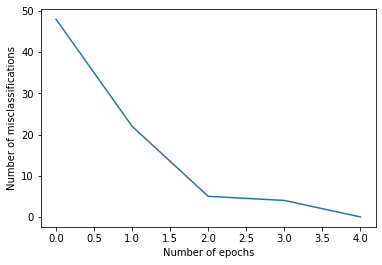

Percentage of misclassified test samples are (for training size -> 50): 44.440000000000005


In [9]:
W = pta(50, 1, 0, initial_W)
test_classification(W, 50)

# Question 2.f

#### Here we tried to train the PTA algorithm on on small dataset of size 50, so the number of epochs required to reduce the number of training misclassifications were lower. But, we tried to make predictions on a huge test dataset of 10000 images, due to which the test misclassification percentage was high. That is , the smaller the training data and larger the test data, the more misclassifications our algorithm will likely make.

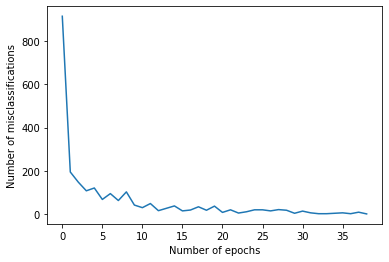

Percentage of misclassified test samples are (for training size -> 1000): 17.61


In [10]:
W = pta(1000, 1, 0, initial_W)
test_classification(W, 1000)

# Question 2.g

#### Here, as we increased the training data size to 1000, our algorithm was able to learn more, and so the misclassifications on the test data decreased significantly as compared to n = 50.

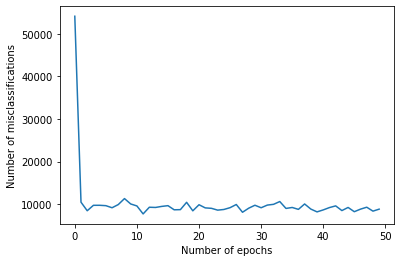

Algorithm failed to converge for training size -> 60000 and epsilon -> 0


In [11]:
W = pta(60000, 1, 0, initial_W)
if W != -1:
    test_classification(W, 60000)
else:
    print("Algorithm failed to converge for training size -> 60000 and epsilon -> 0")
    

# Question 2.h

#### For such a huge training data, the misclassifications keeps increasing or decreasing and the algorithm is not able to find weights that can perfectly classify the dataset. The reason could be that the data is not linearly separable. Hence, we need to put another threshold for the number of epochs (say, 50) and stop the algorithm, otherwise the algorithm may run indefinitely.

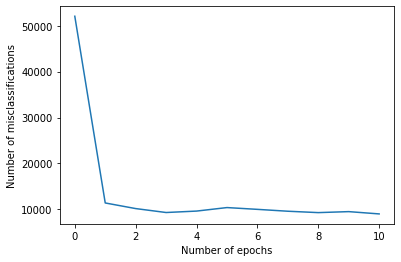

Percentage of misclassified test samples are (for training size -> 60000): 14.39


In [12]:
W = pta(60000, 1, 0.15, initialize_w())
test_classification(W, 60000)

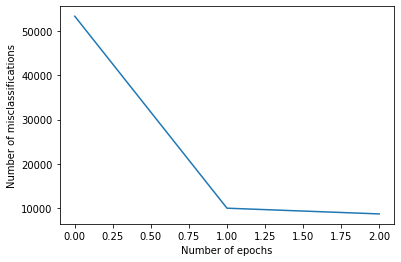

Percentage of misclassified test samples are (for training size -> 60000): 16.96


In [13]:
W = pta(60000, 1, 0.15, initialize_w())
test_classification(W, 60000)

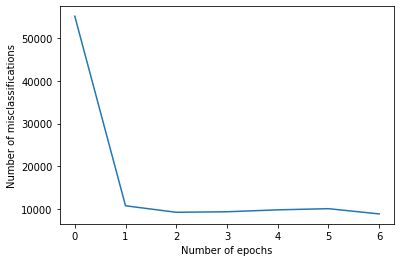

Percentage of misclassified test samples are (for training size -> 60000): 15.98


In [14]:
W = pta(60000, 1, 0.15, initialize_w())
test_classification(W, 60000)

# Question 2.i

#### We observe that when different weight values are initialized, the initial number of misclassifications for the training data changes slightly. The same effect can be seen on the test data as percentage of misclassifications changes. This results in different number epochs to train the same data. Also, because we observed the algorithm could not converge for n = 60000, the threshold value has been set to 0.15 (that is, we are okay with 85% accuracy). This is because out of 60000, the number of misclassifications revolves around 10000 and does not decrease significantly beyond it, so the errors would be approximately 15 - 16%. 